In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bengaluru2.csv')
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,NaN
1,NaN,NaN,6.05,19.73,14.14,23.74,1.35,3.97,22.77,0.65,5.31,NaN
2,NaN,NaN,11.91,19.88,20.72,4.32,17.40,13.61,12.03,0.53,19.25,NaN
3,NaN,NaN,7.45,21.61,16.88,0.87,5.05,6.52,17.70,0.55,7.47,NaN
4,NaN,NaN,9.52,22.17,21.76,31.38,1.83,4.71,12.72,0.40,4.36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2004,16.60,29.48,3.06,13.68,13.07,6.88,0.67,7.29,15.69,0.21,1.18,51.0
2005,20.44,26.34,2.69,10.33,10.58,6.58,0.66,6.60,17.59,0.12,0.94,61.0
2006,28.68,29.27,3.62,12.12,12.94,6.80,0.56,6.33,16.99,0.17,1.17,65.0
2007,14.47,24.26,4.61,12.69,15.00,6.82,0.56,6.45,16.08,0.18,0.86,63.0


In [4]:
# Data cleaning

df['PM2.5'].fillna(0, inplace=True)
df['PM10'].fillna(0, inplace=True)
df['NO'].fillna(0, inplace=True)
df['NO2'].fillna(0, inplace=True)
df['NOx'].fillna(0, inplace=True)
df['NH3'].fillna(0, inplace=True)
df['CO'].fillna(0, inplace=True)
df['SO2'].fillna(0, inplace=True)
df['O3'].fillna(0, inplace=True)
df['Benzene'].fillna(0, inplace=True)
df['Toluene'].fillna(0, inplace=True)
df['AQI'].fillna(0, inplace=True)
#dataset['PM10'].fillna(0, inplace=True)
#dataset = dataset[24:] # drop the first day
print(df.head(5))
#dataset.to_csv('aqi3.csv') # save new CSV

   PM2.5  PM10     NO    NO2    NOx    NH3     CO    SO2     O3  Benzene  \
0    0.0   0.0   3.26  17.33  10.88  20.36   0.33   3.54  10.73     0.56   
1    0.0   0.0   6.05  19.73  14.14  23.74   1.35   3.97  22.77     0.65   
2    0.0   0.0  11.91  19.88  20.72   4.32  17.40  13.61  12.03     0.53   
3    0.0   0.0   7.45  21.61  16.88   0.87   5.05   6.52  17.70     0.55   
4    0.0   0.0   9.52  22.17  21.76  31.38   1.83   4.71  12.72     0.40   

   Toluene  AQI  
0     4.64  0.0  
1     5.31  0.0  
2    19.25  0.0  
3     7.47  0.0  
4     4.36  0.0  


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = df.values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')
values[:,4]

array([230., 348., 610., ..., 297., 382., 377.], dtype=float32)

In [6]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [7]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])

  return X,Y

In [8]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (2005, 1)
X (2005, 4, 12)


In [9]:
nrows = X.shape[0]
nrows

2005

In [10]:

#Splitting the dataset
nrows = X.shape[0]
n_train = 1604
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (401, 4, 12)
X_test (1604, 4, 12)
Y_train (401, 1)
Y_test (1604, 1)


In [11]:
X_test

array([[[0.        , 0.        , 0.03424729, ..., 0.00182161,
         0.01127527, 0.        ],
        [0.        , 0.        , 0.0635571 , ..., 0.00211437,
         0.01290338, 0.        ],
        [0.        , 0.        , 0.12511818, ..., 0.00172403,
         0.0467778 , 0.        ],
        [0.        , 0.        , 0.07826452, ..., 0.00178908,
         0.01815222, 0.        ]],

       [[0.        , 0.        , 0.0635571 , ..., 0.00211437,
         0.01290338, 0.        ],
        [0.        , 0.        , 0.12511818, ..., 0.00172403,
         0.0467778 , 0.        ],
        [0.        , 0.        , 0.07826452, ..., 0.00178908,
         0.01815222, 0.        ],
        [0.        , 0.        , 0.10001051, ..., 0.00130115,
         0.01059487, 0.        ]],

       [[0.        , 0.        , 0.12511818, ..., 0.00172403,
         0.0467778 , 0.        ],
        [0.        , 0.        , 0.07826452, ..., 0.00178908,
         0.01815222, 0.        ],
        [0.        , 0.        , 0.1

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [13]:
model.fit(X_train, Y_train, epochs = 20, batch_size = 32)

Epoch 1/20
13/13 [==============================] - 8s 13ms/step - loss: 0.0036
Epoch 2/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0015
Epoch 3/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0015
Epoch 4/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 5/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0014
Epoch 6/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0014
Epoch 7/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 8/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 9/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 10/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 11/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0011
Epoch 12/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0012
Epoch 13/20
13/13 [==================

In [14]:
from keras.models import load_model
model.save('AirPollutionMultivariate.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)
rmse

51/51 [==============================] - 2s 4ms/step


0.07257626

In [16]:
Y_pred

array([[0.03253479],
       [0.0383987 ],
       [0.03991371],
       ...,
       [0.11794806],
       [0.1155109 ],
       [0.10754024]], dtype=float32)

In [17]:
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_dataset.shape)

y_predicted (1604, 1)
X_test (1604, 4, 12)
scaled Values shape (2009, 12)


In [18]:
d = scaled_dataset[:1604,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:1604,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:1604,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (1604, 12)
Y_pred (1604, 1)
concat y_pred (1604, 1)
concat Y_test (1604, 1)


In [19]:
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (1604, 1)
Y_predicted (1604, 1)


In [20]:
Y_tested

array([[ 0.      ],
       [ 0.      ],
       [ 0.      ],
       ...,
       [26.07    ],
       [22.499998],
       [25.77    ]], dtype=float32)

In [21]:
Y_predicted

array([[10.202586],
       [12.04145 ],
       [12.516541],
       ...,
       [36.98733 ],
       [36.223064],
       [33.723545]], dtype=float32)

In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)

rmse = np.sqrt(mse)
rmse

22.759192

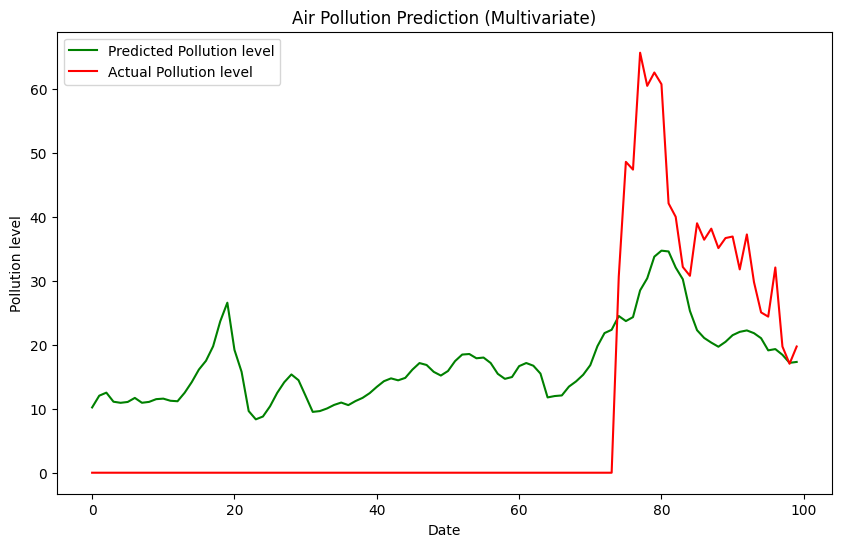

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(10,6))
plt.plot(Y_predicted[:100,:], color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested[:100,:] , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.legend()
plt.show()
plt.savefig('graph.png')

In [24]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)


MAPE inf


<ipython-input-24-b85ca2e8cc51>:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
#print('Mean squared error', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))

RMSE 22.759192
Mean of Test data  34.479477
